<a href="https://colab.research.google.com/github/EllaThomasson/labs-ds3001/blob/main/Lab_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import json
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


Question 1

In [ ]:

# I did practice writing queries using saferproducts.gov.

# Here is an example:
url = 'https://www.saferproducts.gov/RestWebServices/Recall?format=json&ProductType=Phone'


Question 2

In [ ]:

# I practiced with the saferproducts.gov API!

url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
query = 'Recall?format=json&ProductType=Exercise' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()


Question 3

In [ ]:

df = pd.DataFrame.from_dict(data)

def flatten_dict(column, key):
    clean_values = []
    for item in column:
        if item:  # Check if the item is not empty
            values = []
            for sub_item in item:
                if isinstance(sub_item, dict) and key in sub_item:  # Check if it's a dict and contains the key
                    values.append(sub_item[key])
            clean_values.append(values)
        else:
            clean_values.append('')  # Append empty string if item is empty
    return clean_values


df['remedy'] = flatten_dict(df['RemedyOptions'], 'Option')
df['country'] = flatten_dict(df['ManufacturerCountries'], 'Country')
df['distributers'] = flatten_dict(df['Distributors'], 'Name')

# I believe this works! I didnt see any problems in the above 3 examples from the data!


0                 [McDonald's Corp., of Oakbrook, Ill.]
1                                                      
2                                                      
3     [Coulter Ventures LLC, dba Rogue Fitness, of C...
4                                                      
                            ...                        
86                                                     
87                                                     
88                                                     
89                                                     
90                                                     
Name: distributers, Length: 91, dtype: object


<ipython-input-22-e072055b2101>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x='Country', y='Count', palette='viridis')


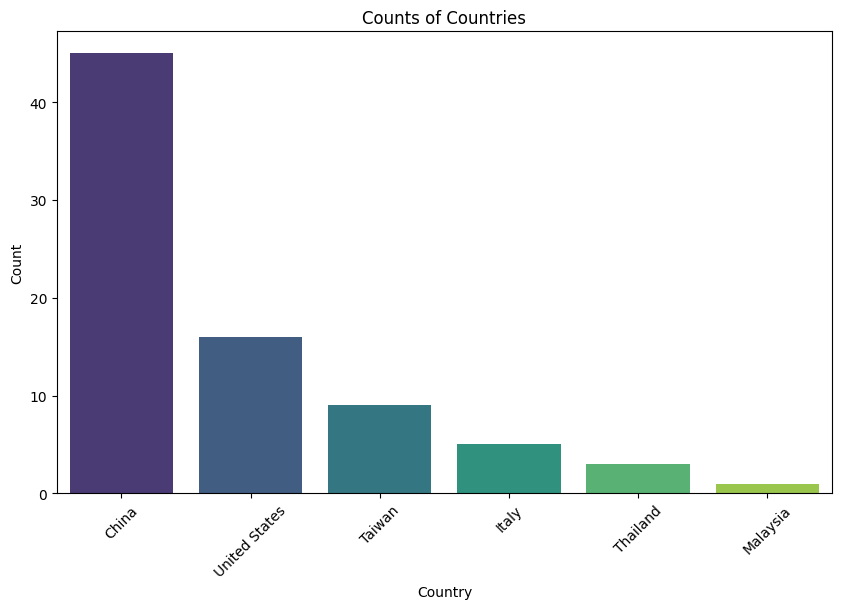

In [ ]:

# Here, we are looking at the countries that showed up the most often in this safer products data. Maybe certain countries are more often involved in recalls based on safety concerns.


counts = df['country'].value_counts().reset_index()
counts.columns = ['Country', 'Count']

counts_df = pd.DataFrame(counts)

flattened_countries = []
for index, row in counts_df.iterrows():
    countries = row['Country']
    count = row['Count']
    if isinstance(countries, list) and countries:  # Check if it's a list and not empty
        for country in countries:
            flattened_countries.append((country, count))

flattened_df = pd.DataFrame(flattened_countries, columns=['Country', 'Count'])


country_counts = flattened_df.groupby('Country').sum().reset_index()
country_counts = country_counts.sort_values(by='Count', ascending=False)


# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts, x='Country', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.title('Counts of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()



<ipython-input-23-c97e5a1833b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_pddf, x='Combined_Country', y='Count', palette='viridis')


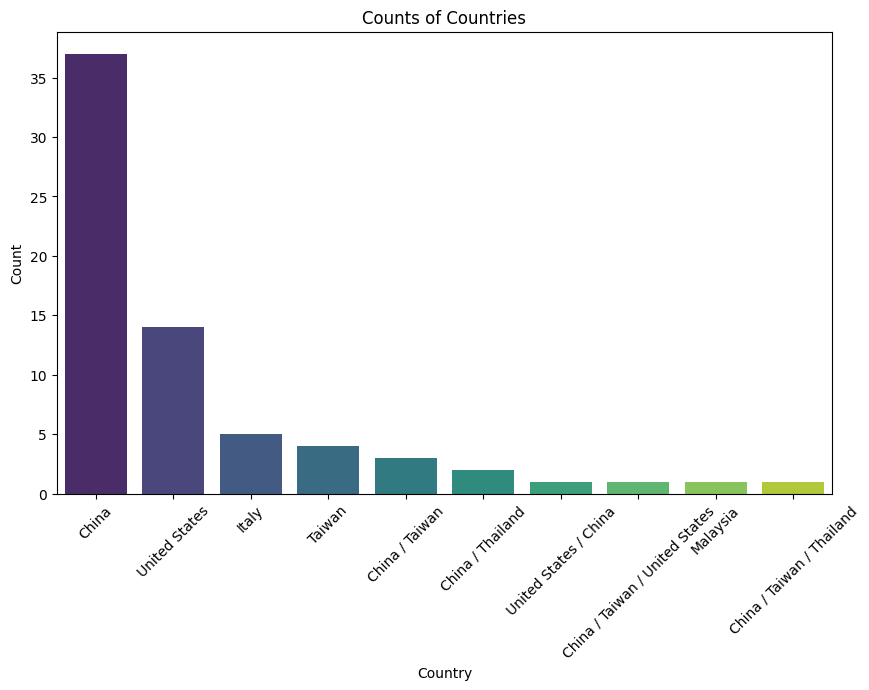

In [ ]:

# but, maybe at the same time it is interesting to look at countries involved in scandles alone and with other countries, and treat these as unique things. Maybe somthing can be said
# about 2+ countries generally being involved in these safety concerns together.

country_pddf = pd.DataFrame(counts_df)

# Create Combined_Country
country_pddf['Combined_Country'] = country_pddf['Country'].apply(
    lambda x: ' / '.join(x) if isinstance(x, list) else x
)

country_pddf = country_pddf[country_pddf['Combined_Country'].str.strip() != '']

# Check for NaN values and drop them if necessary
country_pddf = country_pddf.dropna(subset=['Combined_Country', 'Count'])

# Ensure 'Count' is numeric
country_pddf['Count'] = pd.to_numeric(country_pddf['Count'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=country_pddf, x='Combined_Country', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.title('Counts of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()



Question 4

In [ ]:
# optional - did not have time

Question 5

In [ ]:

# api call

api_key = 'MRLVP1tc5BpEuFVaMYB8vJGUfmzcCt3YcTrKavIz'
url = f'https://api.eia.gov/v2/total-energy/data/?api_key={api_key}&frequency=annual&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

response = urllib.request.urlopen(url)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

df = pd.DataFrame(data['response']['data'])


In [ ]:
df

,period,msn,seriesDescription,value,unit
0,2024,CCIEKUS,Coal Coke Imports and Exports Heat Content in ...,24.8,Million Btu per Short Ton
1,2024,WCDOKUS,Waste Coal Supplied Heat Content in Million Bt...,11.268,Million Btu per Short Ton
2,2024,RPIMKUS,Petroleum Products Imports Heat Content in Mil...,5.472,Million Btu per Barrel
3,2024,RPEXKUS,Petroleum Products Exports Heat Content in Mil...,4.806,Million Btu per Barrel
4,2024,PCTCKUS,Petroleum Coke Consumption Heat Content in Mil...,6.151,Million Btu per Barrel
...,...,...,...,...,...
4995,2019,ARTCBUS,Asphalt and Road Oil Product Supplied in Trill...,843.883,Trillion Btu
4996,2019,ARNFPUS,Asphalt & Road Oil Non-Combustion Consumption ...,348.404,Thousand Barrels per Day
4997,2019,ARNFBUS,Asphalt & Road Oil Non-Combustion Consumption ...,.843883,Quadrillion Btu
4998,2019,ARICPUS,Asphalt and Road Oil Consumed by the Industria...,348.404,Thousand Barrels per Day


In [ ]:

# wrangling - making NA values, making the data numeric

df['value'].value_counts()

df['value'] = df['value'].replace(['Not Available', 'No Data Reported','Withheld','Not Applicable'],np.nan)

df['value'].value_counts()

df['value'] = pd.to_numeric(df['value'])


<ipython-input-37-f5bde37399c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_per_year, x='period', y='value', palette='viridis')


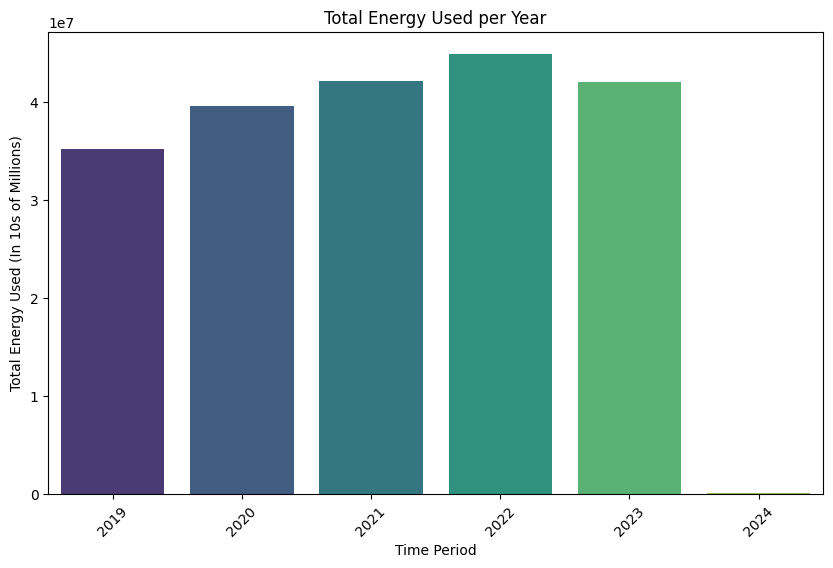

In [ ]:

# here, we are looking at the total energy used per year.

total_per_year = df.groupby('period')['value'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=total_per_year, x='period', y='value', palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Energy Used per Year')
plt.xlabel('Time Period')
plt.ylabel('Total Energy Used (In 10s of Millions)')
plt.show()


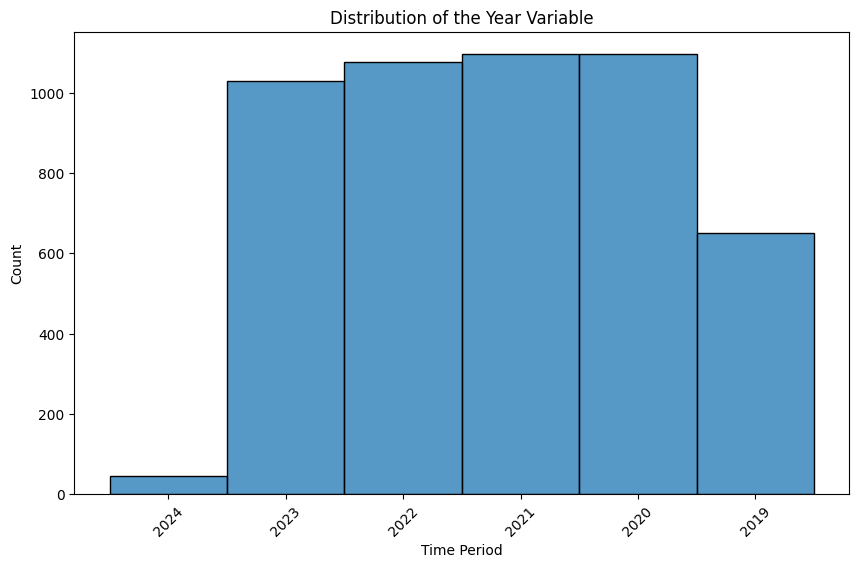

In [ ]:

# I think after seeing this graph, it is helpful to now look at the distribution of the year variable within this data.

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='period')
plt.xticks(rotation=45)
plt.title('Distribution of the Year Variable')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.show()